# Salary Discrimination

The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

Tasks:
1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best  R2  score.
3. Report whether sex is a factor in salary.

# Importing Necessary Libraries

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset 

In [224]:
df = pd.read_fwf("C:\\Users\\Revanth\\Desktop\\salary.txt")

In [225]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


# Data Cleaning

In [226]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [227]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [228]:
iqr = df.Year.quantile(0.75)-df.Year.quantile(0.25)
UL = df.Year.quantile(0.75) + (1.5*iqr)
LL = df.Year.quantile(0.25) - (1.5*iqr)
UL, LL

(23.0, -9.0)

In [229]:
iqr = df.YSdeg.quantile(0.75)-df.YSdeg.quantile(0.25)
UL1 = df.YSdeg.quantile(0.75) + (1.5*iqr)
LL1 = df.YSdeg.quantile(0.25) - (1.5*iqr)
UL1, LL1

(48.0, -18.0)

In [230]:
iqr = df.Salary.quantile(0.75)-df.Salary.quantile(0.25)
UL2 = df.Salary.quantile(0.75) + (1.5*iqr)
LL2 = df.Salary.quantile(0.25) - (1.5*iqr)
UL2, LL2

(40776.125, 4729.125)

In [231]:
df = df.drop_duplicates()

In [232]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

# Exploratory Data Analysis

### Sex vs Salary 

<AxesSubplot: xlabel='Sex'>

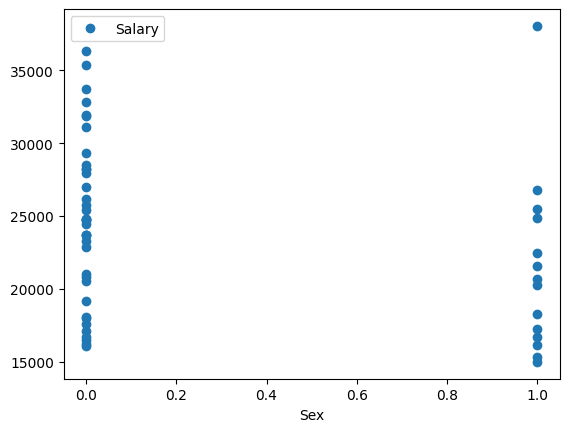

In [233]:
df.plot(x="Sex", y='Salary', style="o")

<AxesSubplot: xlabel='Sex'>

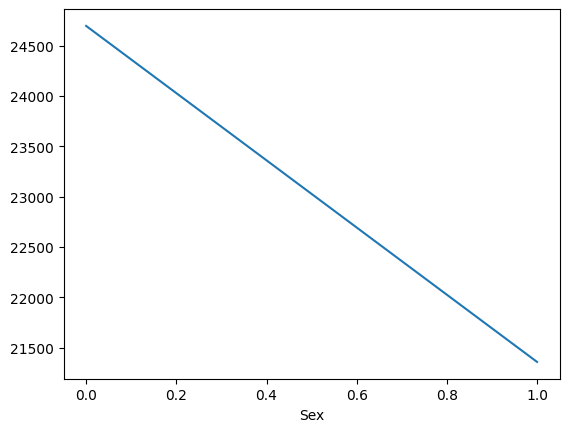

In [234]:
df.groupby("Sex")["Salary"].mean().plot()

In [235]:
df[["Sex","Salary"]].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


### Rank vs Salary

<AxesSubplot: xlabel='Rank'>

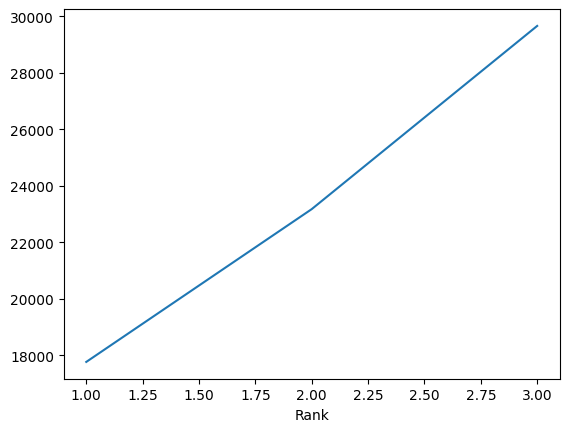

In [236]:
df.groupby("Rank")["Salary"].mean().plot()

In [237]:
df[["Rank","Salary"]].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


### Year vs Salary 

<AxesSubplot: xlabel='Year'>

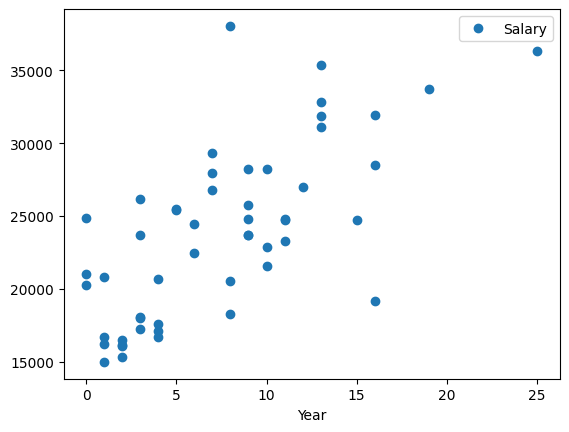

In [238]:
df.plot(x="Year", y="Salary", style="o")

In [239]:
df[["Year","Salary"]].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


### Degree vs Salary

<AxesSubplot: xlabel='Degree'>

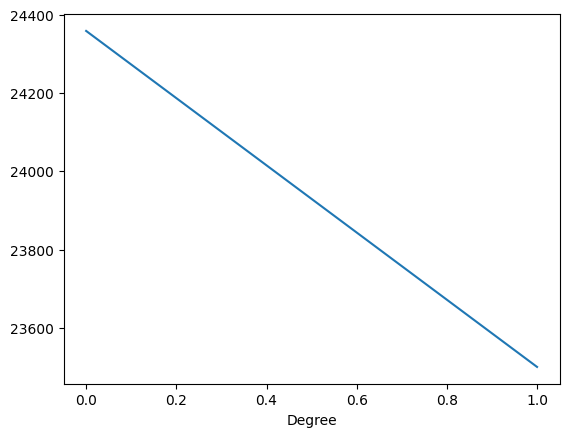

In [240]:
df.groupby("Degree")["Salary"].mean().plot()

In [241]:
df[["Degree","Salary"]].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


The degree column doesn't have linear relationship with salary column. Hence, dropping the "Degree" column.

### YSdeg vs Salary 

<AxesSubplot: xlabel='YSdeg'>

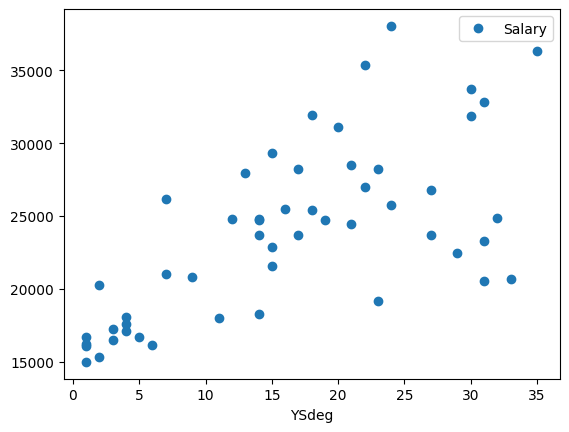

In [242]:
df.plot(x="YSdeg", y="Salary", style="o")

In [243]:
df[["YSdeg","Salary"]].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [244]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


# Splitting of Dataset

In [245]:
from sklearn.model_selection import train_test_split
x = df.loc[:,["Sex","Rank","Year","YSdeg"]].values
y = df.loc[:,"Salary"].values
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3)

# Scaling 

In [246]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit(train_x)
train_x_scaled = SS.transform(train_x)
test_x_scaled = SS.transform(test_x)

# Model

In [247]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_x_scaled,train_y)

LinearRegression()

In [248]:
regressor.coef_

array([ 514.36553207, 4139.21890268, 2281.56305473, -400.61988279])

In [249]:
regressor.intercept_

24172.38888888889

## 1. Linear Regression Equation 

In [259]:
# y = (514.36 * Sex) + (4139.22 * Rank) + (2281.56 * Year) + (-400.62 * YSdeg) + 11754.96

In [251]:
y_pred = regressor.predict(test_x_scaled)

# Actual vs Predicted

In [252]:
dff = pd.DataFrame({"Actual":test_y, "Predcted":y_pred})

In [253]:
dff

,Actual,Predcted
0,20850,20685.186565
1,25400,26967.195622
2,24750,26762.203430
3,31850,30177.698141
4,26775,28610.789434
5,29342,28019.987137
6,16244,16216.900339
7,17600,17483.380255
8,16094,16680.754625
9,20690,22167.219952


# Evaluation Metrics : R2-Score 

In [254]:
from sklearn import metrics
metrics.r2_score(test_y, y_pred)

0.9386582196892356

## 2. Find the selection of columns with the best  R2  score.

### R2-Score : Sex vs Salary 

In [255]:
x = df.loc[:,["Sex"]].values
y = df.loc[:,"Salary"].values
Sex_xtr,Sex_xte,Sal_ytr,Sal_yte = train_test_split(x,y,test_size=0.3)
regressor = LinearRegression()
regressor.fit(Sex_xtr,Sal_ytr)
regressor.score(Sex_xte, Sal_yte)

0.02450611268432179

### R2-Score : Rank vs Salary 

In [256]:
x = df.loc[:,["Rank"]].values
y = df.loc[:,"Salary"].values
R_xtr,R_xte,Sal_ytr,Sal_yte = train_test_split(x,y,test_size=0.3)
regressor = LinearRegression()
regressor.fit(R_xtr,Sal_ytr)
regressor.score(R_xte, Sal_yte)

0.8313052271924266

### R2-Score : Year vs Salary 

In [257]:
x = df.loc[:,["Year"]].values
y = df.loc[:,"Salary"].values
Y_xtr,Y_xte,Sal_ytr,Sal_yte = train_test_split(x,y,test_size=0.3)
regressor = LinearRegression()
regressor.fit(Y_xtr,Sal_ytr)
regressor.score(Y_xte, Sal_yte)

0.6967307330394428

### R2-Score : YSdeg vs Salary 

In [258]:
x = df.loc[:,["YSdeg"]].values
y = df.loc[:,"Salary"].values
YS_xtr,YS_xte,Sal_ytr,Sal_yte = train_test_split(x,y,test_size=0.3)
regressor = LinearRegression()
regressor.fit(YS_xtr,Sal_ytr)
regressor.score(YS_xte, Sal_yte)

0.6444885938063467

The "Rank" Column has the best R2-Score of 0.83 with our target column "Salary".

### 3. Report whether sex is a factor in salary.

Here, The R2-Score of Sex vs Salary is 0.02. Which directly indicates that "SEX" is not a factor in salary.